In [61]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/Assignment_Train.csv")
df.head()

,DEALER ID,APPLICATION LOGIN DATE,HDB BRANCH NAME,HDB BRANCH STATE,FIRST NAME,MIDDLE NAME,LAST NAME,mobile,AADHAR VERIFIED,Cibil Score,...,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status
0,106989,07/20/2022,DELHI-SF,DELHI,SUNIL,NaN,CHANDER,9210574080,NO,726,...,0.0,0.0,1.0,NaN,NaN,0.0,5324.0,67.222222,High,APPROVED
1,108975,07/28/2022,PATNA-SF,BIHAR,AMRIT,NaN,KUMAR,8877987018,NO,NaN,...,0.0,0.0,0.0,NaN,NaN,0.0,1998.0,100.000000,High,APPROVED
2,111004,07/15/2022,DARJEELING-SF,WEST BENGAL,ANIMESH,NaN,THAPA,8910862135,NO,737,...,0.0,0.0,0.0,NaN,NaN,0.0,-1.0,-1.000000,Low,APPROVED
3,192020,07/04/22,SAHARANPUR-SF,UTTAR PRADESH,ADITYA,NaN,SINGH,9758428017,NO,713,...,0.0,0.0,1.0,NaN,NaN,0.0,1998.0,72.777778,High,APPROVED
4,55095,07/15/2022,MODASA-SF,GUJARAT,PARMAR,HARESHBHAI,AMRUTBHAI,9687028486,NO,669,...,0.0,0.0,1.0,NaN,NaN,0.0,1998.0,68.095238,High,DECLINED


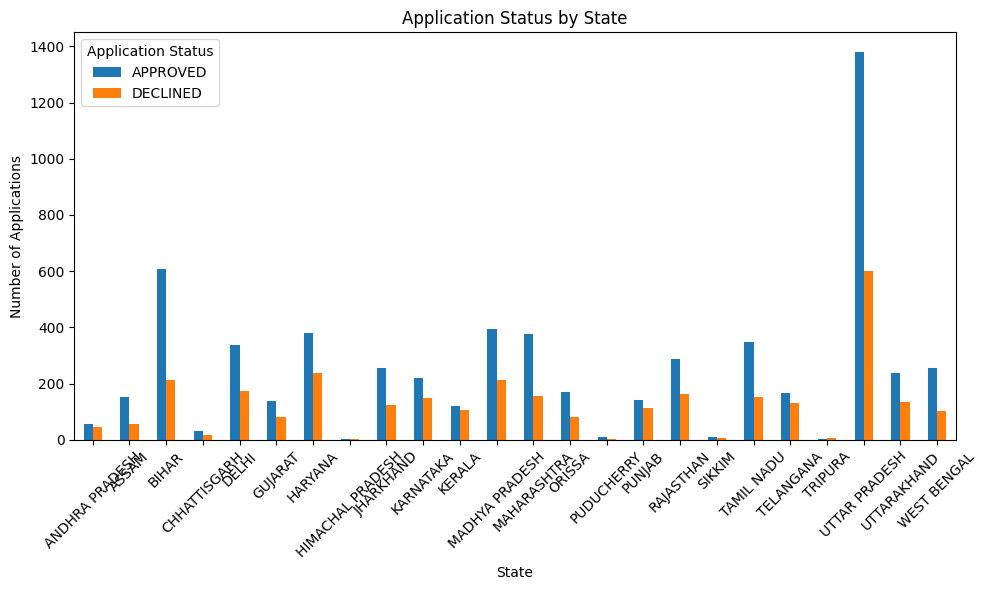

In [62]:
import matplotlib.pyplot as plt
state_status = df.groupby(['HDB BRANCH STATE', 'Application Status']).size().unstack(fill_value=0)
state_status[['APPROVED', 'DECLINED']].plot(kind='bar', figsize=(10, 6))
plt.title('Application Status by State')
plt.xlabel('State')
plt.ylabel('Number of Applications')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [63]:
state_status['Approval Ratio'] = state_status['APPROVED'] / state_status['DECLINED']
state_status['Approval Ratio'] = state_status['Approval Ratio'].fillna(0).replace(np.inf, 0)
state_status

Application Status,APPROVED,DECLINED,Approval Ratio
HDB BRANCH STATE,,,
ANDHRA PRADESH,57,47,1.212766
ASSAM,151,57,2.649123
BIHAR,607,211,2.876777
CHHATTISGARH,31,18,1.722222
DELHI,338,173,1.953757
GUJARAT,136,82,1.658537
HARYANA,380,238,1.596639
HIMACHAL PRADESH,2,3,0.666667
JHARKHAND,257,124,2.072581


In [64]:
state_status['Approval Rate'] = state_status['APPROVED'] / (state_status['APPROVED'] + state_status['DECLINED'])
high_approval_states = state_status[state_status['Approval Rate'] > 0.625].index.tolist()
print(high_approval_states)

['ASSAM', 'BIHAR', 'CHHATTISGARH', 'DELHI', 'JHARKHAND', 'MADHYA PRADESH', 'MAHARASHTRA', 'ORISSA', 'PUDUCHERRY', 'RAJASTHAN', 'TAMIL NADU', 'UTTAR PRADESH', 'UTTARAKHAND', 'WEST BENGAL']


In [65]:
high_approval_states = state_status[state_status['Approval Rate'] > 0.625].index.tolist()

# Create a DataFrame for high approval states
high_approval_df = df[df['HDB BRANCH STATE'].isin(high_approval_states)]

# Create a DataFrame for the remaining states
other_states_df = df[~df['HDB BRANCH STATE'].isin(high_approval_states)]

# Save the DataFrames to CSV files
high_approval_df.to_csv('high_approval_states.csv', index=False)
other_states_df.to_csv('other_states.csv', index=False)

In [66]:
# High Approval DataFrame
state_approvals_high = high_approval_df[high_approval_df['Application Status'] == 'APPROVED'].groupby('HDB BRANCH STATE')['Application Status'].count()
high_approval_df = high_approval_df.merge(state_approvals_high, on='HDB BRANCH STATE', how='left')
high_approval_df.rename(columns={'Application Status_y': 'State Approvals'}, inplace=True)

# Other States DataFrame
state_approvals_other = other_states_df[other_states_df['Application Status'] == 'APPROVED'].groupby('HDB BRANCH STATE')['Application Status'].count()
other_states_df = other_states_df.merge(state_approvals_other, on='HDB BRANCH STATE', how='left')
other_states_df.rename(columns={'Application Status_y': 'State Approvals'}, inplace=True)


In [67]:
high_approval_df['State'] = high_approval_df['HDB BRANCH NAME'] + ', ' + high_approval_df['HDB BRANCH STATE']

# Other States DataFrame
other_states_df['State'] = other_states_df['HDB BRANCH NAME'] + ', ' + other_states_df['HDB BRANCH STATE']

In [68]:
# High Approval DataFrame
high_approval_df = high_approval_df.drop(['HDB BRANCH NAME', 'HDB BRANCH STATE'], axis=1)

# Other States DataFrame
other_states_df = other_states_df.drop(['HDB BRANCH NAME', 'HDB BRANCH STATE'], axis=1)

In [69]:
high_approval_df.head()

,DEALER ID,APPLICATION LOGIN DATE,FIRST NAME,MIDDLE NAME,LAST NAME,mobile,AADHAR VERIFIED,Cibil Score,MOBILE VERIFICATION,DEALER NAME,...,Phone Social Premium.toi,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status_x,State Approvals,State
0,106989,07/20/2022,SUNIL,NaN,CHANDER,9210574080,NO,726,True,V D AUTO WHEELS CHHOTIAL,...,1.0,NaN,NaN,0.0,5324.0,67.222222,High,APPROVED,338,"DELHI-SF, DELHI"
1,108975,07/28/2022,AMRIT,NaN,KUMAR,8877987018,NO,NaN,True,CHANDAN AUTOMOBILES 259 KGS TOWER,...,0.0,NaN,NaN,0.0,1998.0,100.000000,High,APPROVED,607,"PATNA-SF, BIHAR"
2,111004,07/15/2022,ANIMESH,NaN,THAPA,8910862135,NO,737,True,KN VISION 53HILL CART ROAD,...,0.0,NaN,NaN,0.0,-1.0,-1.000000,Low,APPROVED,254,"DARJEELING-SF, WEST BENGAL"
3,192020,07/04/22,ADITYA,NaN,SINGH,9758428017,NO,713,True,MAHADEV AUTOMOBILES MANGLAUR,...,1.0,NaN,NaN,0.0,1998.0,72.777778,High,APPROVED,1381,"SAHARANPUR-SF, UTTAR PRADESH"
4,100398,07/25/2022,ROYEL,NaN,HAZARI,8287660919,NO,NaN,True,G K MOTORS P L VIKAS MARG,...,0.0,NaN,NaN,0.0,750.0,100.000000,Medium,APPROVED,338,"DELHI EAST-SF, DELHI"


In [70]:
import difflib

def compare_names(row):
  """Compares 'PAN NAME' and the combined full name."""
  # Convert potential float values to strings
  full_name = f"{str(row['FIRST NAME'])}  {str(row['LAST NAME'])}".strip()
  pan_name = str(row['Pan Name'])  # Convert 'Pan Name' to string
  similarity_ratio = difflib.SequenceMatcher(None, pan_name, full_name).ratio()
  return 'Similar' if similarity_ratio >= 0.70 else 'Not Similar'  # Adjust threshold as needed

# Apply the function to create a new column in high_approval_df
high_approval_df['Name Similarity'] = high_approval_df.apply(compare_names, axis=1)
high_approval_df.head()

,DEALER ID,APPLICATION LOGIN DATE,FIRST NAME,MIDDLE NAME,LAST NAME,mobile,AADHAR VERIFIED,Cibil Score,MOBILE VERIFICATION,DEALER NAME,...,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status_x,State Approvals,State,Name Similarity
0,106989,07/20/2022,SUNIL,NaN,CHANDER,9210574080,NO,726,True,V D AUTO WHEELS CHHOTIAL,...,NaN,NaN,0.0,5324.0,67.222222,High,APPROVED,338,"DELHI-SF, DELHI",Not Similar
1,108975,07/28/2022,AMRIT,NaN,KUMAR,8877987018,NO,NaN,True,CHANDAN AUTOMOBILES 259 KGS TOWER,...,NaN,NaN,0.0,1998.0,100.000000,High,APPROVED,607,"PATNA-SF, BIHAR",Similar
2,111004,07/15/2022,ANIMESH,NaN,THAPA,8910862135,NO,737,True,KN VISION 53HILL CART ROAD,...,NaN,NaN,0.0,-1.0,-1.000000,Low,APPROVED,254,"DARJEELING-SF, WEST BENGAL",Similar
3,192020,07/04/22,ADITYA,NaN,SINGH,9758428017,NO,713,True,MAHADEV AUTOMOBILES MANGLAUR,...,NaN,NaN,0.0,1998.0,72.777778,High,APPROVED,1381,"SAHARANPUR-SF, UTTAR PRADESH",Not Similar
4,100398,07/25/2022,ROYEL,NaN,HAZARI,8287660919,NO,NaN,True,G K MOTORS P L VIKAS MARG,...,NaN,NaN,0.0,750.0,100.000000,Medium,APPROVED,338,"DELHI EAST-SF, DELHI",Similar


In [71]:
other_states_df['Name Similarity'] = other_states_df.apply(compare_names, axis=1)
other_states_df.head()

,DEALER ID,APPLICATION LOGIN DATE,FIRST NAME,MIDDLE NAME,LAST NAME,mobile,AADHAR VERIFIED,Cibil Score,MOBILE VERIFICATION,DEALER NAME,...,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status_x,State Approvals,State,Name Similarity
0,55095,07/15/2022,PARMAR,HARESHBHAI,AMRUTBHAI,9687028486,NO,669,True,DWARKESH AUTO SHAMLAJI ROAD,...,NaN,NaN,0.0,1998.0,68.095238,High,DECLINED,136.0,"MODASA-SF, GUJARAT",Not Similar
1,200558,07/26/2022,AAYSHA,ABDUL,LATEEF,9720733482,NO,NaN,True,R K MOTORS NANITAL ROAD,...,NaN,NaN,0.0,1998.0,73.015873,High,APPROVED,NaN,NaN,Not Similar
2,80787,07/04/22,DEEPAK,NaN,RAMMEHAR,9992177321,NO,NaN,True,BANSAL AUTO SALES ROHTAK ROAD JIND,...,NaN,NaN,0.0,1998.0,79.411765,High,APPROVED,380.0,"JIND-SF, HARYANA",Not Similar
3,112019,07/04/22,AYASHEEN,NaN,DEEN,9813815927,NO,798,True,JAI BALAJI MOTORS MUNDHAL,...,NaN,NaN,0.0,2401.0,100.000000,High,DECLINED,380.0,"BHIWANI-SF, HARYANA",Similar
4,81711,07/12/22,SHARIF,NaN,NABISAB,7019623825,NO,NaN,True,VIRGO MOTOR AGENCIES P L HOSPET ROD,...,1.0,NaN,0.0,1988.0,81.250000,High,DECLINED,221.0,"BELLARY-SF, KARNATAKA",Not Similar


In [72]:
high_approval_df['Cibil Score'] = pd.to_numeric(high_approval_df['Cibil Score'], errors='coerce').fillna(0).astype(int)
high_approval_df['Cibil Score'].dtype

other_states_df['Cibil Score'] = pd.to_numeric(other_states_df['Cibil Score'], errors = 'coerce').fillna(0).astype(int)
other_states_df['Cibil Score'].dtype

dtype('int64')

In [73]:
bins = [300, 600, 750, 900]
labels = ['Low', 'Medium', 'High']

# Assign scores to bins for high_approval_df, use the correct column name 'Cibil Score'
high_approval_df['CIBIL Score Category'] = pd.cut(high_approval_df['Cibil Score'], bins=bins, labels=labels, right=False)

# Include 'Unknown' in the categories
high_approval_df['CIBIL Score Category'] = high_approval_df['CIBIL Score Category'].cat.add_categories('Unknown')

# Handle missing values
high_approval_df['CIBIL Score Category'].fillna('Unknown', inplace=True)
high_approval_df.head()


,DEALER ID,APPLICATION LOGIN DATE,FIRST NAME,MIDDLE NAME,LAST NAME,mobile,AADHAR VERIFIED,Cibil Score,MOBILE VERIFICATION,DEALER NAME,...,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status_x,State Approvals,State,Name Similarity,CIBIL Score Category
0,106989,07/20/2022,SUNIL,NaN,CHANDER,9210574080,NO,726,True,V D AUTO WHEELS CHHOTIAL,...,NaN,0.0,5324.0,67.222222,High,APPROVED,338,"DELHI-SF, DELHI",Not Similar,Medium
1,108975,07/28/2022,AMRIT,NaN,KUMAR,8877987018,NO,0,True,CHANDAN AUTOMOBILES 259 KGS TOWER,...,NaN,0.0,1998.0,100.000000,High,APPROVED,607,"PATNA-SF, BIHAR",Similar,Unknown
2,111004,07/15/2022,ANIMESH,NaN,THAPA,8910862135,NO,737,True,KN VISION 53HILL CART ROAD,...,NaN,0.0,-1.0,-1.000000,Low,APPROVED,254,"DARJEELING-SF, WEST BENGAL",Similar,Medium
3,192020,07/04/22,ADITYA,NaN,SINGH,9758428017,NO,713,True,MAHADEV AUTOMOBILES MANGLAUR,...,NaN,0.0,1998.0,72.777778,High,APPROVED,1381,"SAHARANPUR-SF, UTTAR PRADESH",Not Similar,Medium
4,100398,07/25/2022,ROYEL,NaN,HAZARI,8287660919,NO,0,True,G K MOTORS P L VIKAS MARG,...,NaN,0.0,750.0,100.000000,Medium,APPROVED,338,"DELHI EAST-SF, DELHI",Similar,Unknown


In [74]:
other_states_df['CIBIL Score Category'] = pd.cut(other_states_df['Cibil Score'], bins=bins, labels=labels, right=False)

# Include 'Unknown' in the categories
other_states_df['CIBIL Score Category'] = other_states_df['CIBIL Score Category'].cat.add_categories('Unknown')

# Handle missing values
other_states_df['CIBIL Score Category'].fillna('Unknown', inplace=True)
other_states_df.head()

,DEALER ID,APPLICATION LOGIN DATE,FIRST NAME,MIDDLE NAME,LAST NAME,mobile,AADHAR VERIFIED,Cibil Score,MOBILE VERIFICATION,DEALER NAME,...,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status_x,State Approvals,State,Name Similarity,CIBIL Score Category
0,55095,07/15/2022,PARMAR,HARESHBHAI,AMRUTBHAI,9687028486,NO,669,True,DWARKESH AUTO SHAMLAJI ROAD,...,NaN,0.0,1998.0,68.095238,High,DECLINED,136.0,"MODASA-SF, GUJARAT",Not Similar,Medium
1,200558,07/26/2022,AAYSHA,ABDUL,LATEEF,9720733482,NO,0,True,R K MOTORS NANITAL ROAD,...,NaN,0.0,1998.0,73.015873,High,APPROVED,NaN,NaN,Not Similar,Unknown
2,80787,07/04/22,DEEPAK,NaN,RAMMEHAR,9992177321,NO,0,True,BANSAL AUTO SALES ROHTAK ROAD JIND,...,NaN,0.0,1998.0,79.411765,High,APPROVED,380.0,"JIND-SF, HARYANA",Not Similar,Unknown
3,112019,07/04/22,AYASHEEN,NaN,DEEN,9813815927,NO,798,True,JAI BALAJI MOTORS MUNDHAL,...,NaN,0.0,2401.0,100.000000,High,DECLINED,380.0,"BHIWANI-SF, HARYANA",Similar,High
4,81711,07/12/22,SHARIF,NaN,NABISAB,7019623825,NO,0,True,VIRGO MOTOR AGENCIES P L HOSPET ROD,...,NaN,0.0,1988.0,81.250000,High,DECLINED,221.0,"BELLARY-SF, KARNATAKA",Not Similar,Unknown


In [75]:
high_approval_df.to_csv('high_approval_df.csv', index=False)

In [76]:
columns_to_keep = ['DEALER ID', 'Cibil Score', 'MOBILE VERIFICATION', 'TOTAL ASSET COST', 'APPLIED AMOUNT', 'EMPLOYER TYPE', 'Phone Social Premium.housing', 'Phone Social Premium.isWABusiness',  'phone_digitalage', 'phone_nameMatchScore', 'phone_phoneFootprintStrengthOverall', 'Name Similarity', 'CIBIL Score Category', 'State']

In [77]:
other_states_df = other_states_df[columns_to_keep]

In [78]:
high_approval_df = high_approval_df[columns_to_keep]

In [79]:
high_approval_df = high_approval_df.rename(columns={'Application Status_x': 'Application Status'})
high_approval_df.head()

,DEALER ID,Cibil Score,MOBILE VERIFICATION,TOTAL ASSET COST,APPLIED AMOUNT,EMPLOYER TYPE,Phone Social Premium.a23games,Phone Social Premium.housing,Phone Social Premium.isWABusiness,Phone Social Premium.my11,Phone Social Premium.rummycircle,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status,State Approvals,Name Similarity,CIBIL Score Category,State
0,106989,726,True,95041.0,85000,SALARIED,NaN,0.0,NaN,NaN,NaN,5324.0,67.222222,High,APPROVED,338,Not Similar,Medium,"DELHI-SF, DELHI"
1,108975,0,True,NaN,90000,NaN,NaN,0.0,NaN,NaN,NaN,1998.0,100.000000,High,APPROVED,607,Similar,Unknown,"PATNA-SF, BIHAR"
2,111004,737,True,119436.0,75000,SELF-EMPLOYED,NaN,0.0,NaN,NaN,NaN,-1.0,-1.000000,Low,APPROVED,254,Similar,Medium,"DARJEELING-SF, WEST BENGAL"
3,192020,713,True,87000.0,78500,SELF-EMPLOYED,NaN,1.0,NaN,NaN,NaN,1998.0,72.777778,High,APPROVED,1381,Not Similar,Medium,"SAHARANPUR-SF, UTTAR PRADESH"
4,100398,0,True,112562.0,99999,SALARIED,NaN,0.0,NaN,NaN,NaN,750.0,100.000000,Medium,APPROVED,338,Similar,Unknown,"DELHI EAST-SF, DELHI"


In [80]:
other_states_df = other_states_df.rename(columns={'Application Status_x': 'Application Status'})
other_states_df.head()

,DEALER ID,Cibil Score,MOBILE VERIFICATION,TOTAL ASSET COST,APPLIED AMOUNT,EMPLOYER TYPE,Phone Social Premium.a23games,Phone Social Premium.housing,Phone Social Premium.isWABusiness,Phone Social Premium.my11,Phone Social Premium.rummycircle,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status,State Approvals,Name Similarity,CIBIL Score Category,State
0,55095,669,True,NaN,70000,NaN,NaN,0.0,NaN,NaN,NaN,1998.0,68.095238,High,DECLINED,136.0,Not Similar,Medium,"MODASA-SF, GUJARAT"
1,200558,0,True,NaN,107000,NaN,NaN,0.0,NaN,NaN,NaN,1998.0,73.015873,High,APPROVED,NaN,Not Similar,Unknown,NaN
2,80787,0,True,78120.0,72500,SELF-EMPLOYED,NaN,0.0,NaN,NaN,NaN,1998.0,79.411765,High,APPROVED,380.0,Not Similar,Unknown,"JIND-SF, HARYANA"
3,112019,798,True,NaN,74500,NaN,NaN,0.0,NaN,NaN,NaN,2401.0,100.000000,High,DECLINED,380.0,Similar,High,"BHIWANI-SF, HARYANA"
4,81711,0,True,NaN,104000,NaN,NaN,0.0,0.0,NaN,NaN,1988.0,81.250000,High,DECLINED,221.0,Not Similar,Unknown,"BELLARY-SF, KARNATAKA"


In [81]:
print(high_approval_df['Phone Social Premium.my11'].unique())
print(high_approval_df['Phone Social Premium.a23games'].unique())
print(high_approval_df['Phone Social Premium.rummycircle'].unique())
print(high_approval_df['Phone Social Premium.housing'].unique())
print(high_approval_df['Phone Social Premium.isWABusiness'].unique())

[nan  0.]
[nan  0.]
[nan  0.]
[ 0.  1. nan]
[nan  0.  1.]


In [82]:
high_approval_df['Phone Social Premium.housing'] = high_approval_df['Phone Social Premium.housing'].fillna(0)
high_approval_df['Phone Social Premium.isWABusiness'] = high_approval_df['Phone Social Premium.isWABusiness'].fillna(0)

In [83]:
other_states_df['Phone Social Premium.housing'] = other_states_df['Phone Social Premium.housing'].fillna(0)
other_states_df['Phone Social Premium.isWABusiness'] = other_states_df['Phone Social Premium.isWABusiness'].fillna(0)

In [84]:
other_states_df = other_states_df.drop(['Phone Social Premium.my11', 'Phone Social Premium.a23games', 'Phone Social Premium.rummycircle'], axis=1)
other_states_df.head()

,DEALER ID,Cibil Score,MOBILE VERIFICATION,TOTAL ASSET COST,APPLIED AMOUNT,EMPLOYER TYPE,Phone Social Premium.housing,Phone Social Premium.isWABusiness,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status,State Approvals,Name Similarity,CIBIL Score Category,State
0,55095,669,True,NaN,70000,NaN,0.0,0.0,1998.0,68.095238,High,DECLINED,136.0,Not Similar,Medium,"MODASA-SF, GUJARAT"
1,200558,0,True,NaN,107000,NaN,0.0,0.0,1998.0,73.015873,High,APPROVED,NaN,Not Similar,Unknown,NaN
2,80787,0,True,78120.0,72500,SELF-EMPLOYED,0.0,0.0,1998.0,79.411765,High,APPROVED,380.0,Not Similar,Unknown,"JIND-SF, HARYANA"
3,112019,798,True,NaN,74500,NaN,0.0,0.0,2401.0,100.000000,High,DECLINED,380.0,Similar,High,"BHIWANI-SF, HARYANA"
4,81711,0,True,NaN,104000,NaN,0.0,0.0,1988.0,81.250000,High,DECLINED,221.0,Not Similar,Unknown,"BELLARY-SF, KARNATAKA"


In [85]:
other_states_df = other_states_df.dropna(subset=['EMPLOYER TYPE'])
other_states_df = other_states_df.drop('DEALER ID', axis=1)
other_states_df.head()

,Cibil Score,MOBILE VERIFICATION,TOTAL ASSET COST,APPLIED AMOUNT,EMPLOYER TYPE,Phone Social Premium.housing,Phone Social Premium.isWABusiness,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status,State Approvals,Name Similarity,CIBIL Score Category,State
2,0,True,78120.0,72500,SELF-EMPLOYED,0.0,0.0,1998.0,79.411765,High,APPROVED,380.0,Not Similar,Unknown,"JIND-SF, HARYANA"
5,0,True,118175.0,99999,SELF-EMPLOYED,0.0,0.0,1988.0,100.000000,High,APPROVED,121.0,Not Similar,Unknown,"TIRUR-SF, KERALA"
6,0,True,95186.0,96000,SALARIED,0.0,0.0,1998.0,100.000000,High,APPROVED,380.0,Similar,Unknown,"GURGAON-SF, HARYANA"
7,0,True,92500.0,90000,SELF-EMPLOYED,0.0,0.0,1248.0,-1.000000,Low,APPROVED,NaN,Similar,Unknown,NaN
8,769,True,97050.0,98000,SELF-EMPLOYED,0.0,0.0,2401.0,-1.000000,Medium,APPROVED,380.0,Similar,High,"KURUKSHETRA-SF, HARYANA"


In [86]:
high_approval_df = high_approval_df.dropna(subset=['EMPLOYER TYPE'])
high_approval_df = high_approval_df.drop('DEALER ID', axis=1)
high_approval_df.head()

,Cibil Score,MOBILE VERIFICATION,TOTAL ASSET COST,APPLIED AMOUNT,EMPLOYER TYPE,Phone Social Premium.a23games,Phone Social Premium.housing,Phone Social Premium.isWABusiness,Phone Social Premium.my11,Phone Social Premium.rummycircle,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status,State Approvals,Name Similarity,CIBIL Score Category,State
0,726,True,95041.0,85000,SALARIED,NaN,0.0,0.0,NaN,NaN,5324.0,67.222222,High,APPROVED,338,Not Similar,Medium,"DELHI-SF, DELHI"
2,737,True,119436.0,75000,SELF-EMPLOYED,NaN,0.0,0.0,NaN,NaN,-1.0,-1.000000,Low,APPROVED,254,Similar,Medium,"DARJEELING-SF, WEST BENGAL"
3,713,True,87000.0,78500,SELF-EMPLOYED,NaN,1.0,0.0,NaN,NaN,1998.0,72.777778,High,APPROVED,1381,Not Similar,Medium,"SAHARANPUR-SF, UTTAR PRADESH"
4,0,True,112562.0,99999,SALARIED,NaN,0.0,0.0,NaN,NaN,750.0,100.000000,Medium,APPROVED,338,Similar,Unknown,"DELHI EAST-SF, DELHI"
6,0,True,109500.0,90000,SELF-EMPLOYED,NaN,0.0,0.0,NaN,NaN,1988.0,71.759259,High,APPROVED,607,Not Similar,Unknown,"NAWADA-SF, BIHAR"


In [88]:
high_approval_df = high_approval_df.dropna(subset=['State'])
other_states_df_df = other_states_df.dropna(subset=['State'])

In [89]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
def apply_label_encoder(df, columns_to_encode):
  le = LabelEncoder()
  for col in columns_to_encode:
    if col in df.columns:
      df[col] = le.fit_transform(df[col])
  return df

def scale_numerical_features(df, columns_to_scale):
  scaler = MinMaxScaler()
  df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
  return df

In [90]:
categorical_cols = ['MOBILE VERIFICATION', 'EMPLOYER TYPE', 'Application Status', 'Name Similarity', 'CIBIL Score Category', 'Phone Social Premium.housing', 'Phone Social Premium.isWABusiness', 'phone_phoneFootprintStrengthOverall', 'State'] # Moved 'State Approvals' to categorical_cols
numerical_cols = ['Cibil Score', 'TOTAL ASSET COST', 'APPLIED AMOUNT', 'phone_digitalage', 'phone_nameMatchScore', 'State Approvals']

for col in numerical_cols:
  high_approval_df = scale_numerical_features(high_approval_df, [col])

for col in categorical_cols:
  high_approval_df = apply_label_encoder(high_approval_df, [col])

In [91]:
for col in numerical_cols:
  other_states_df = scale_numerical_features(high_approval_df, [col])

for col in categorical_cols:
  other_states_df = apply_label_encoder(high_approval_df, [col])

In [92]:
other_states_df.head()

,Cibil Score,MOBILE VERIFICATION,TOTAL ASSET COST,APPLIED AMOUNT,EMPLOYER TYPE,Phone Social Premium.a23games,Phone Social Premium.housing,Phone Social Premium.isWABusiness,Phone Social Premium.my11,Phone Social Premium.rummycircle,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status,State Approvals,Name Similarity,CIBIL Score Category,State
0,0.886447,0,0.239693,0.045747,2,NaN,0,0,NaN,NaN,0.843631,0.675468,0,0,0.239241,0,2,80
2,0.899878,0,0.375148,0.038599,3,NaN,0,0,NaN,NaN,0.000000,0.000000,1,0,0.177972,1,2,73
3,0.870574,0,0.195045,0.041101,3,NaN,1,0,NaN,NaN,0.316698,0.730473,0,0,1.000000,0,2,241
4,0.000000,0,0.336980,0.056468,2,NaN,0,0,NaN,NaN,0.118980,1.000000,2,0,0.239241,1,3,76
6,0.000000,0,0.319978,0.049321,3,NaN,0,0,NaN,NaN,0.315114,0.720389,0,0,0.435449,0,3,201


In [93]:
high_approval_df.head()

,Cibil Score,MOBILE VERIFICATION,TOTAL ASSET COST,APPLIED AMOUNT,EMPLOYER TYPE,Phone Social Premium.a23games,Phone Social Premium.housing,Phone Social Premium.isWABusiness,Phone Social Premium.my11,Phone Social Premium.rummycircle,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status,State Approvals,Name Similarity,CIBIL Score Category,State
0,0.886447,0,0.239693,0.045747,2,NaN,0,0,NaN,NaN,0.843631,0.675468,0,0,0.239241,0,2,80
2,0.899878,0,0.375148,0.038599,3,NaN,0,0,NaN,NaN,0.000000,0.000000,1,0,0.177972,1,2,73
3,0.870574,0,0.195045,0.041101,3,NaN,1,0,NaN,NaN,0.316698,0.730473,0,0,1.000000,0,2,241
4,0.000000,0,0.336980,0.056468,2,NaN,0,0,NaN,NaN,0.118980,1.000000,2,0,0.239241,1,3,76
6,0.000000,0,0.319978,0.049321,3,NaN,0,0,NaN,NaN,0.315114,0.720389,0,0,0.435449,0,3,201


In [101]:
# Assuming both DataFrames have the same columns and you want to append rows
merged_df = pd.concat([high_approval_df, other_states_df], ignore_index=True)
merged_df.drop(['Phone Social Premium.a23games', 'Phone Social Premium.my11', 'Phone Social Premium.rummycircle'], axis=1, inplace=True)

# Check the shape of the merged DataFrame
print(merged_df.shape)
merged_df.head()
merged_df.drop(['State Approvals'], axis = 1, inplace = True)
merged_df.head()

(7356, 15)


,Cibil Score,MOBILE VERIFICATION,TOTAL ASSET COST,APPLIED AMOUNT,EMPLOYER TYPE,Phone Social Premium.housing,Phone Social Premium.isWABusiness,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status,Name Similarity,CIBIL Score Category,State
0,0.886447,0,0.239693,0.045747,2,0,0,0.843631,0.675468,0,0,0,2,80
1,0.899878,0,0.375148,0.038599,3,0,0,0.000000,0.000000,1,0,1,2,73
2,0.870574,0,0.195045,0.041101,3,1,0,0.316698,0.730473,0,0,0,2,241
3,0.000000,0,0.336980,0.056468,2,0,0,0.118980,1.000000,2,0,1,3,76
4,0.000000,0,0.319978,0.049321,3,0,0,0.315114,0.720389,0,0,0,3,201


In [102]:
from sklearn.model_selection import train_test_split

X = merged_df.drop(['Application Status'], axis = 1)
y = merged_df['Application Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (5884, 13) (5884,)
Testing set shape: (1472, 13) (1472,)


In [103]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

xgb_model = xgb.XGBClassifier(random_state=42)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9972826086956522
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1463
           1       1.00      0.56      0.71         9

    accuracy                           1.00      1472
   macro avg       1.00      0.78      0.86      1472
weighted avg       1.00      1.00      1.00      1472



In [105]:
import joblib
joblib.dump(xgb_model, 'applicationStatus_model.pkl')

['applicationStatus_model.pkl']